In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
df = pd.read_excel('/content/power.xlsx')
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17
...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17
21236,2.758,0.290,238.61,11.6,1,1,18
21237,2.750,0.286,238.07,11.6,2,1,17
21238,2.918,0.268,237.10,12.4,1,1,18


In [ ]:
df.shape

(21240, 7)

EDA

Check Dimension
Check Data
Check outliers
summary starts
missing value
scaling

In [ ]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

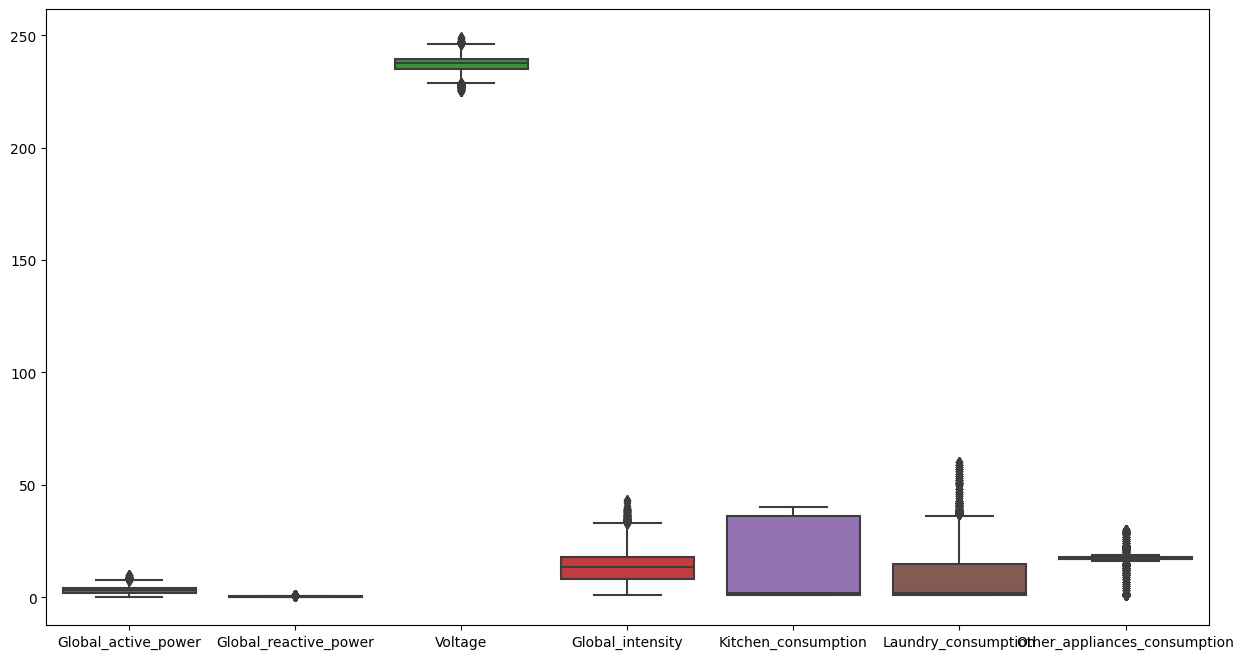

In [ ]:
sns.boxplot(data=df)
plt.show()

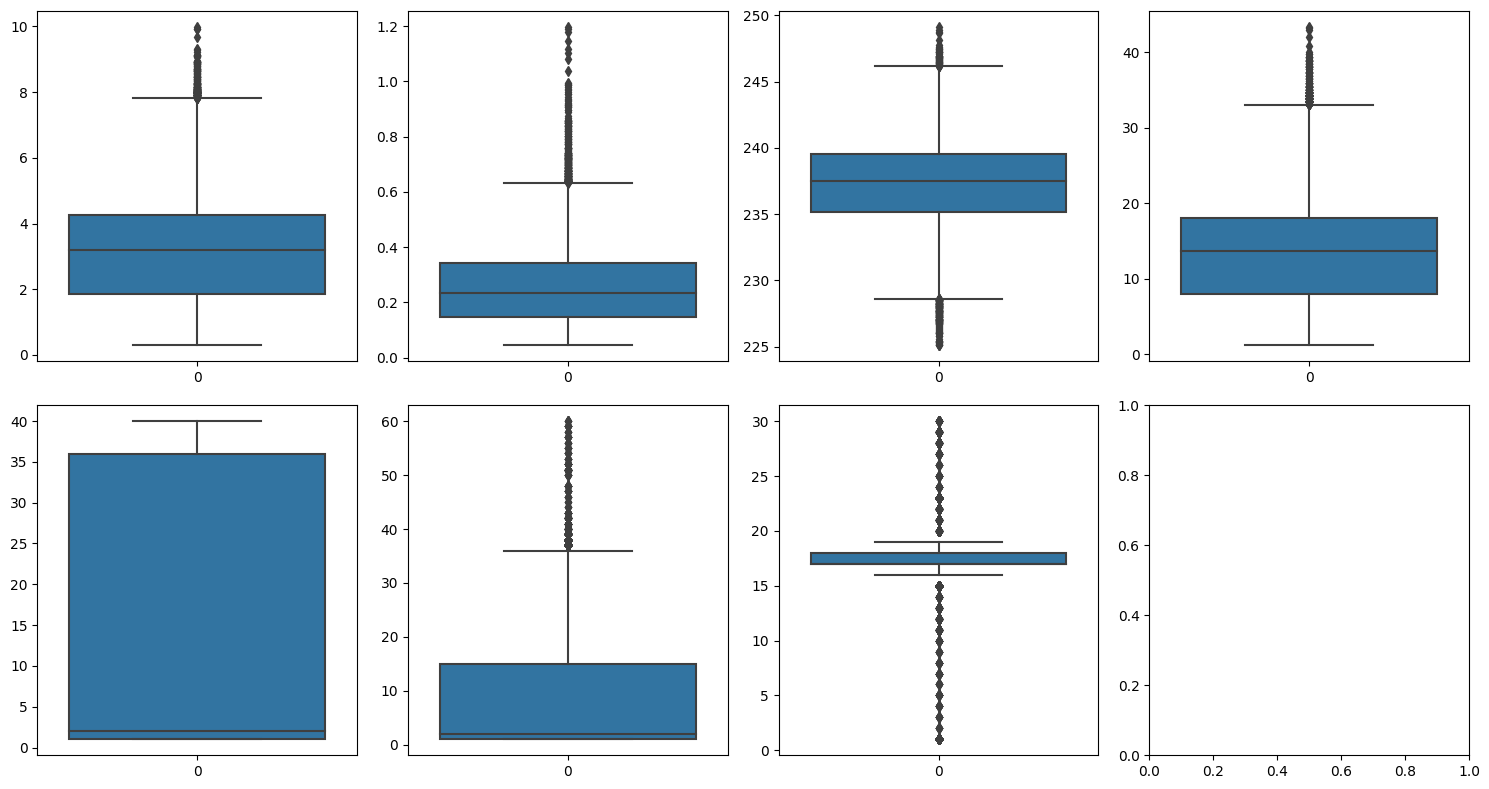

In [ ]:
fig, ax = plt.subplots(2,4,figsize =(15,8))
for var, subplot in zip(df.columns, ax.flatten()):
  sns.boxplot(df[var],ax = subplot)
plt.tight_layout()
plt.show()

## Outliers removing

In [ ]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
df = df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr))).any(axis = 1)]
df = df.reset_index(drop=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [ ]:
df.shape

(16724, 7)

## summary

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,3.197480,0.249404,237.351591,13.601495,13.151937,6.802141,17.428426
std,1.444141,0.132148,3.289317,6.204866,16.384600,10.920451,0.705236
min,0.302000,0.046000,228.600000,1.200000,1.000000,1.000000,16.000000
25%,1.858000,0.144000,235.220000,7.800000,1.000000,1.000000,17.000000
50%,3.096000,0.230000,237.510000,13.200000,1.000000,2.000000,17.000000
75%,4.100000,0.332000,239.520000,17.400000,36.000000,4.000000,18.000000
max,7.716000,0.632000,246.150000,33.000000,40.000000,36.000000,19.000000


In [ ]:
df.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

# Scaling

In [ ]:
features = df.copy()
features.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17


In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_scaled =  pd.DataFrame(features, columns = df.columns)
features_scaled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.661645,-0.661430,-0.006564,-0.580448,-0.741690,0.018119,-0.607511
1,0.357676,0.352612,-0.669335,0.354330,-0.680656,2.582192,-0.607511
2,0.010054,0.413151,-0.413956,0.096460,-0.741690,1.758026,-0.607511
3,0.343827,0.231532,-0.666295,0.322096,-0.741690,2.582192,-0.607511
4,0.004515,0.322342,-0.386593,0.064227,-0.741690,1.849600,-0.607511


## K-Means Cluster MODEL

In [ ]:
## Identify the optimal number of clusters

wcss = []
for i in range(1,8):
  kmeans = KMeans(n_clusters = i,random_state = 10)
  kmeans.fit(features_scaled)
  wcss.append(kmeans.inertia_)

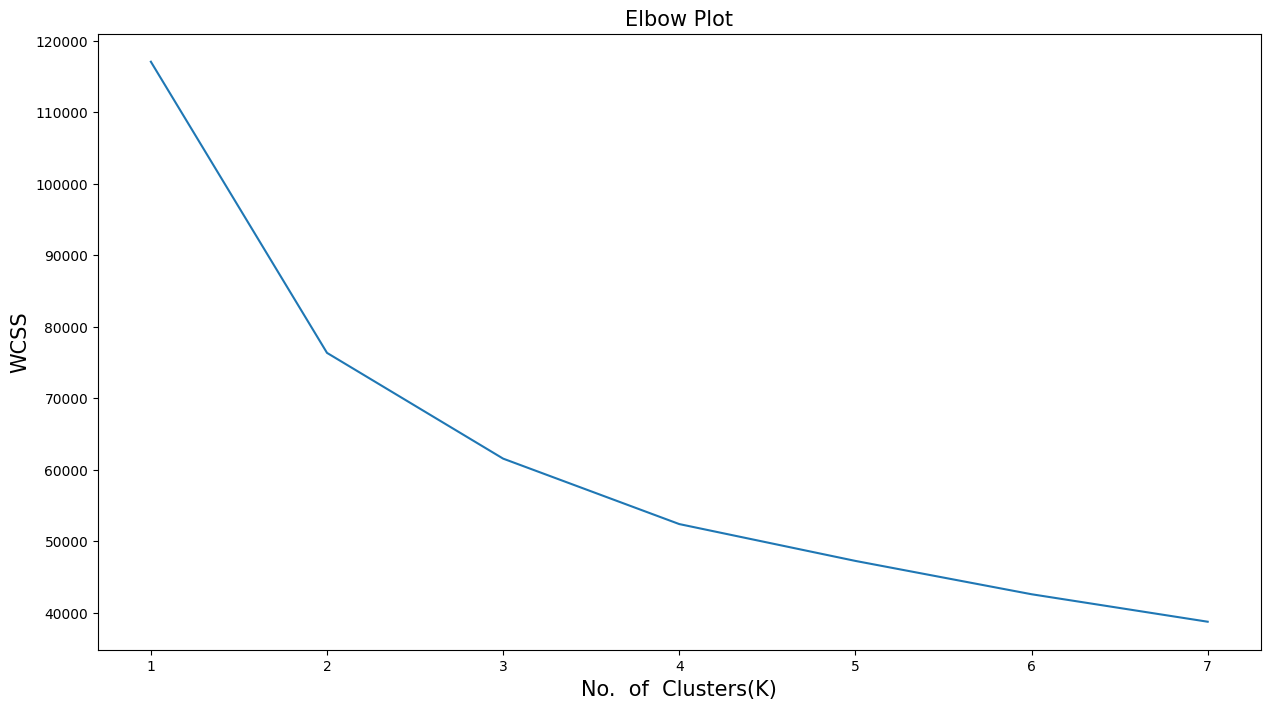

In [ ]:
plt.plot(range(1,8),wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No.  of  Clusters(K)',fontsize = 15)
plt.ylabel('WCSS',fontsize = 15)
plt.show()

In [ ]:
## From the above plot, we can consider that the k = 2 or k = 3 as the optimal number of clusters.

In [ ]:
# Since elbow plot is not clear.we will also use knee locator

In [ ]:
! pip install kneed

# Optimal Number of cluster

In [ ]:
from kneed.knee_locator import KneeLocator
k = KneeLocator(x= range(1,8), y = wcss, curve = 'convex',direction = 'decreasing')
k.elbow

3

# Silhouette score

In [ ]:
n_clusters = [2,3,4,5,6,7]
for K in n_clusters:
  cluster = KMeans(n_clusters = K, random_state = 10)
  predict = cluster.fit_predict(features_scaled)
  score = silhouette_score(features_scaled,predict,random_state = 10)
  print('For n_clusters = {},silhouette score is {}'.format(K,score))


For n_clusters = 2,silhouette score is 0.3285439939591319
For n_clusters = 3,silhouette score is 0.34162545859561044
For n_clusters = 4,silhouette score is 0.2783093083068228
For n_clusters = 5,silhouette score is 0.2872087661116924
For n_clusters = 6,silhouette score is 0.27428917764463195
For n_clusters = 7,silhouette score is 0.2634628924611293


In [ ]:
## from the elbow plot and sillhouette score method ,
## we can consider the optimal number of clusters as 3

## Build the K-Means model for k = 3

In [ ]:
K_model = KMeans(n_clusters = 3, random_state = 10)
K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

In [ ]:
df['Kmeans_label'] = K_model.labels_
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
0,2.242,0.162,237.33,10.0,1,7,17,0
1,3.714,0.296,235.15,15.8,2,35,17,2
2,3.212,0.304,235.99,14.2,1,26,17,2
3,3.694,0.280,235.16,15.6,1,35,17,2
4,3.204,0.292,236.08,14.0,1,27,17,2


In [ ]:
df['Kmeans_label'].value_counts()

0    9040
1    5052
2    2632
Name: Kmeans_label, dtype: int64

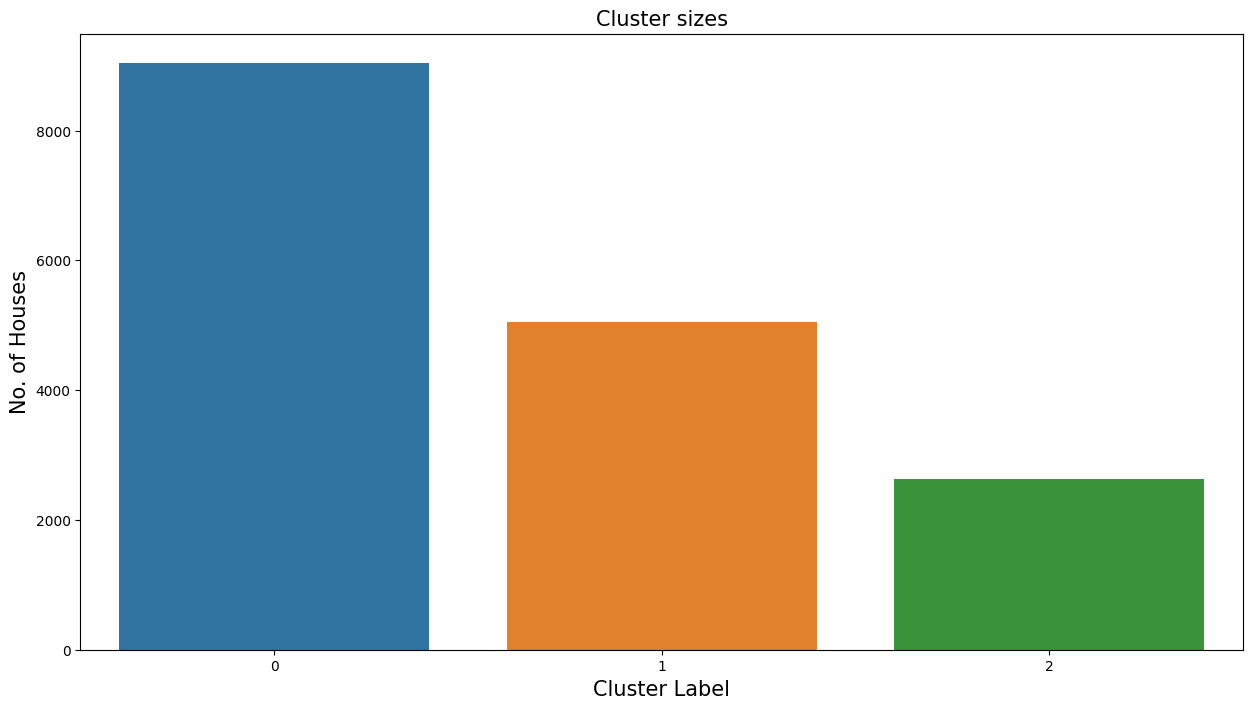

In [ ]:
sns.countplot(data = df, x ='Kmeans_label')
plt.title('Cluster sizes',fontsize = 15)
plt.xlabel('Cluster Label',fontsize = 15)
plt.ylabel('No. of Houses',fontsize = 15)
plt.show()

In [ ]:
# Largest Cluster ----> 0 Lable

# Cluster centers

In [ ]:
# lets find cem=nter of each cluster.

centers = pd.DataFrame(K_model.cluster_centers_,columns =(df.drop('Kmeans_label', axis=1)).columns)
centers

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.752356,-0.074582,0.437979,-0.752492,-0.692633,-0.376804,0.323291
1,0.731003,0.148562,-0.424762,0.724348,1.249091,-0.430561,-0.293989
2,1.180954,-0.028994,-0.688994,1.194195,-0.018619,2.120634,-0.546093


In [ ]:
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
0,2.242,0.162,237.33,10.0,1,7,17,0
1,3.714,0.296,235.15,15.8,2,35,17,2


In [ ]:
unscaled_centers = pd.DataFrame(scaler.inverse_transform(K_model.cluster_centers_),
                                 columns = (df.drop(['Kmeans_label','Kmean_label'],axis =1)).columns)
unscaled_centers

KeyError: ignored

In [ ]:
# Get summary of each cluster
df[df.Kmeans_label == 0].describe()

In [ ]:
df[df.Kmeans_label == 1].describe()

In [ ]:
df[df.Kmeans_label == 2].describe()

In [ ]:
plt.scatter(df['Global_active_power'],df['Global_reactive_power'],c= df['Kmeans_label'])
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')
plt.show()

### **Hierarchical Clustering**

In [ ]:
# Finding optimal number of clustering

link_mat = linkage(features_scaled,method= 'ward')
print(link_mat[0:10])

 Plot the Dendrogram using the above linkage matrix.

In [ ]:
dendro = dendrogram(link_mat)
plt.title('Dendrogram',fontsize = 15)
plt.xlabel('Index',fontsize = 15)
plt.ylabel('Distances',fontsize = 15)

In [ ]:
# From dendrogram we can see k = 2

In [ ]:
hierar_clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
hierar_clusters.fit(features_scaled)

In [ ]:
df['Hierar_label'] = hierar_clusters.labels_
df.head()

In [ ]:
df['Hierar_label'].value_counts()

In [ ]:
## Analysis the summary of clusters

df[df.Hierar_label == 0].describe()

In [ ]:
df[df.Hierar_label == 1].describe()

In [ ]:
plt.scatter(df['Global_active_power'],df['Global_reactive_power'],c= df['Hierar_label'])
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')
plt.show()

# DBScan

In [ ]:
dist_array = euclidean_distances(features_scaled)[np.triu_indices(16724,k=1)]

In [ ]:
print("minimum distance",dist_array.min())
print("maximum distance",dist_array.max())

minimum distance 0.001384947609371129
maximum distance 10.179949808197904


In [ ]:
dbscan_model = DBSCAN(eps = 1.4,min_samples = 4)
dbscan_model.fit(features_scaled)

DBSCAN(eps=1.4, min_samples=4)

In [ ]:
set(dbscan_model.labels_)

{-1, 0, 1, 2, 3}

In [ ]:
df['DBSCAN_label'] = dbscan_model.labels_
df.head()

ValueError: ignored